<a href="https://colab.research.google.com/github/vanof/neural_networks/blob/master/Regression_construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

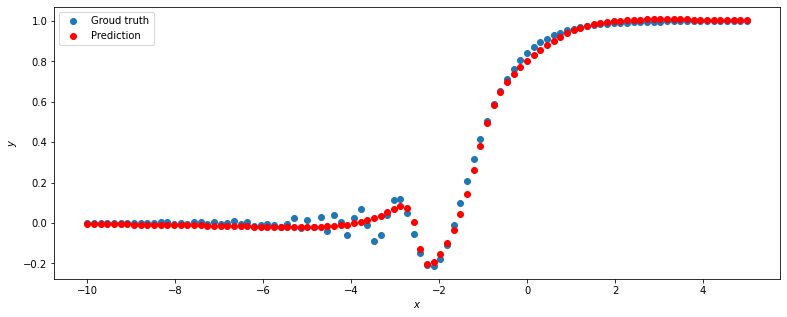

In [6]:
import torch
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

def target_function(x):
    return 2**x * torch.sin(2**-x)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

# model constuction
# https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity
class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

net = RegressionNet(50)

def metric(pred, target):
    return (pred - target).abs().mean()

def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

# optimazer
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

# loss function - вычисление градиента
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

# эпохи обучения - итерация обучения на всем датасете
for epoch_index in range(2000):
    #обнуляем градиент
    optimizer.zero_grad()
    #считаем предсказание и функцию потерь
    y_pred = net.forward(x_train)
    loss_val = loss(y_pred, y_train)
    #берем производную
    loss_val.backward()
    #делаем градиентный шаг
    optimizer.step()

predict(net, x_validation, y_validation)